#Earth Systems Modeling
##Lab 1: Introduction to python and iPython notebook

Problem 1
---
Write a function to solve the definite integral $$\int_0^{100} (ae^{bx} + c) dx$$  See the following documentation: <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad"> Scipy documentation</a>.  
 
Your function must be set up to run with input $a$, $b$, and $c$, which are passed into the function as arguments. Present your function with a description in your blog. Provide the code. [10 pts]

In [10]:
from scipy.integrate import quad as I
from numpy import exp as e

def function_problem1(a, b, c, x=100.0):
    """
    compute the integral:
    f(Ae^(Bx) + C) over x from 0 to x.
    """

    expression = lambda x: a * e(b * x) + c
    y, err = I(expression, a=0, b=x)

    return {'area': y, 'error': err}

# test
A, B, C = 5, -10, 3
output = function_problem1(A, B, C, x=50)
print("the area is ", output['area'], " with +/- ", output['error'])

the area is  150.5  with +/-  4.558312174712722e-10


Problem 2
---
Write a function create a histogram using a random number generator. The histogram should represent a <em>normal</em> distribution of $1 x 10^4$ values. Make sure your distribution has an average of $avg$, and a standard deviation of $b$. Plot these values as a histogram with $n$ number of bins distribution.  The arguments of your function should be $avg$, $b$ and $n$.  See the following documentation: <a href="http://www.mathworks.com/help/matlab/math/random-numbers-with-specific-mean-and-variance.html">Random Numbers from a Normal Distribution | Mathworks</a> and <a href="https://bespokeblog.wordpress.com/2011/07/11/basic-data-plotting-with-matplotlib-part-3-histograms/">Part 3: Histograms | Bespoke Blog</a>.
In your blog, briefly describe your calculation, provide your code and a plot of your histogram. Your plot should include a figure caption describing what the plot depicts. [10 pts]

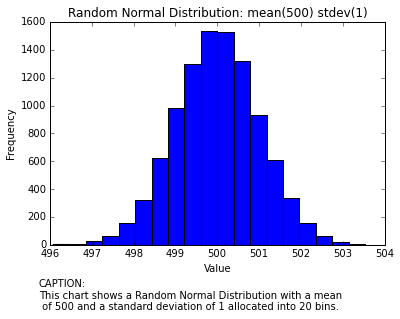

In [2]:
%matplotlib inline

import numpy
import matplotlib.pyplot as plt
import pandas as pd

def function_problem2(avg, b, n):
    """
    for a given mean (avg)
    and stdev (b) return a histogram
    with 1*10^4 samples
    """
    # seed with the grand number
    numpy.random.seed(42) 
    dist = numpy.random.normal(loc=avg, scale=b, size=10000)

    # plot histogram
    fig = plt.figure()
    plt.subplot(111)
    plt.hist(dist, bins=n)
    TXT ="CAPTION:\nThis chart shows a Random Normal Distribution with a mean \n \
of {0} and a standard deviation of {1} allocated into {2} bins.".format(avg, b, n)
    fig.text(.1,-.1,TXT)
    plt.title("Random Normal Distribution: mean({0}) stdev({1})".format(avg, b))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
    
# test
function_problem2(500, 1, 20)

Problem 3: Challenge Problem for Extra Credit
---
Find the volume of a sphere in 4-dimensional euclidean space (a 3-sphere) with a radius of 5cm. (Hint: you will use a random number generator.) Describe your solution to the challenge problem in your blog. [5 pts]

In [12]:
# problem 3.py

# estimate the volume of a sphere
# given a radius

import numpy as np

def function_problem3(radius=5):
    """
    creates a cube
    fills cube with lots of points
    calculated distance between center of cube and points
    estimates volume of sphere as percentage of points in sphere.
    """
    
    volume_of_cube = (2 * radius) ** 3.0
    origin = (radius, radius, radius)
    
    # apply the grand number
    # and get a large set of (x, y, z)
    # coordinates
    np.random.seed(42)
    coords = np.random.uniform(low=0, high= 2*radius, size=(1000000, 3))

    # calculate distance to origin
    distances = np.sqrt(np.sum((coords - radius)**2, axis=1)).flatten()
    
    # how many points are inside vs outside of sphere
    in_sphere, out_sphere = len(distances[distances < radius]), len(distances[distances > radius])
    pcnt = in_sphere / (in_sphere + out_sphere)

    # guess volume
    volume_of_sphere = volume_of_cube * pcnt

    print("volume of sphere: ", volume_of_sphere, "cm^3")


# test
function_problem3(5)

volume of sphere:  523.899 cm^3
